# DS-210: Programming for Data Science


# Lecture 5:<br>&nbsp;&nbsp;&nbsp;Follow-up on Pandas dtypes<br>&nbsp;&nbsp;&nbsp;Classification vs. regression<br>&nbsp;&nbsp;&nbsp;Ethics of data processing


# Announcements
Midterm: 2/27 or 3/1, 12:20–1:10pm, PHO 211<br>
Final: between 05/8 and 05/12 TBD.

* Both open book (meaning notes and books but not laptops or other forms of electronics)
* Midterm: focus on Python + machine learning
* Final: focus on Rust + basic algorithms and data structures

## Gradescope

* Entry code: 4VYYX8
* Reminder: submit an IPython notebook. Or a `.zip` file.

## Setting up our environment for this lecture

In [1]:
import numpy as np
import pandas as pd
import random
import math 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

# print a text file
def print_file(filename):
    with open(filename) as f:
        print(f.read(),end='')
    print("================")

# display data we have read
def show_data(data):
    print(data.dtypes,data,sep='\n---\n')

## Follow-up: Panda dtypes

In [2]:
filename = "sales_data_types.csv"
df = pd.read_csv(filename)
print_file(filename)
df

Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
"10002.0",Quest Industries,"$125,000.00",$162500.00,30.00%,500,1,10,2015,"Y"
552278,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700,6,15,2014,"Y"
23477,ACME Industrial,"$50,000.00",$62500.00,25.00%,125,3,29,2016,"Y"
24900,Brekke LTD,"$350,000.00",$490000.00,4.00%,75,10,27,2015,"Y"
651029,Harbor Co,"$15,000.00",$12750.00,-15.00%,Closed,2,2,2014,"N"


,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002.0,Quest Industries,"$125,000.00",$162500.00,30.00%,500,1,10,2015,Y
1,552278.0,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700,6,15,2014,Y
2,23477.0,ACME Industrial,"$50,000.00",$62500.00,25.00%,125,3,29,2016,Y
3,24900.0,Brekke LTD,"$350,000.00",$490000.00,4.00%,75,10,27,2015,Y
4,651029.0,Harbor Co,"$15,000.00",$12750.00,-15.00%,Closed,2,2,2014,N


In [3]:
print(df['2016'] + df['2017'])
df.dtypes

0      $125,000.00$162500.00
1    $920,000.00$101,2000.00
2        $50,000.00$62500.00
3      $350,000.00$490000.00
4        $15,000.00$12750.00
dtype: object


Customer Number    float64
Customer Name       object
2016                object
2017                object
Percent Growth      object
Jan Units           object
Month                int64
Day                  int64
Year                 int64
Active              object
dtype: object

In [4]:
df['Customer Number'] = df['Customer Number'].astype('int')
df.dtypes

Customer Number     int64
Customer Name      object
2016               object
2017               object
Percent Growth     object
Jan Units          object
Month               int64
Day                 int64
Year                int64
Active             object
dtype: object

In [5]:
df['2016'].astype('float')

ValueError: could not convert string to float: '$125,000.00'

In [6]:
df['Active'].astype('bool')

0    True
1    True
2    True
3    True
4    True
Name: Active, dtype: bool

In [7]:
df = pd.read_csv("sales_data_types.csv")
df["Customer Number"] = df['Customer Number'].astype('int')
df['2016'] = df['2016'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')
df['2017'] = df['2017'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')
df['Percent Growth'] = df['Percent Growth'].apply(lambda x: x.replace('%', '')).astype('float') / 100
df["Jan Units"] = pd.to_numeric(df['Jan Units'], errors='coerce').fillna(0)
df['Active'] = df['Active'].apply(lambda x: True if x == 'Y' else False)
df["Start_Date"] = pd.to_datetime(df[['Month', 'Day', 'Year']])
print(df)
df.dtypes

   Customer Number     Customer Name      2016       2017  Percent Growth  \
0            10002  Quest Industries  125000.0   162500.0            0.30   
1           552278    Smith Plumbing  920000.0  1012000.0            0.10   
2            23477   ACME Industrial   50000.0    62500.0            0.25   
3            24900        Brekke LTD  350000.0   490000.0            0.04   
4           651029         Harbor Co   15000.0    12750.0           -0.15   

   Jan Units  Month  Day  Year  Active Start_Date  
0      500.0      1   10  2015    True 2015-01-10  
1      700.0      6   15  2014    True 2014-06-15  
2      125.0      3   29  2016    True 2016-03-29  
3       75.0     10   27  2015    True 2015-10-27  
4        0.0      2    2  2014   False 2014-02-02  


Customer Number             int64
Customer Name              object
2016                      float64
2017                      float64
Percent Growth            float64
Jan Units                 float64
Month                       int64
Day                         int64
Year                        int64
Active                       bool
Start_Date         datetime64[ns]
dtype: object

## other problems with dtypes 

In [8]:
print_file('data2.csv') 
data = pd.read_csv("data2.csv")
show_data(data) 

Name,LikesIceCream,Age
Alice,True,54
Bob,False,52
Carol,False,44
Eugene,True,130
Name             object
LikesIceCream      bool
Age               int64
dtype: object
---
     Name  LikesIceCream  Age
0   Alice           True   54
1     Bob          False   52
2   Carol          False   44
3  Eugene           True  130


In [14]:
types = {'Age':'int8'}
data = pd.read_csv("data2.csv",dtype=types)
show_data(data)

Name             object
LikesIceCream      bool
Age                int8
dtype: object
---
     Name  LikesIceCream  Age
0   Alice           True   54
1     Bob          False   52
2   Carol          False   44
3  Eugene           True -126


**Warning: no error when an input integer overflows a small–size integer variable!**

## Follow-up: other dtypes 

https://pandas.pydata.org/pandas-docs/stable/reference/arrays.html

<div align="center">
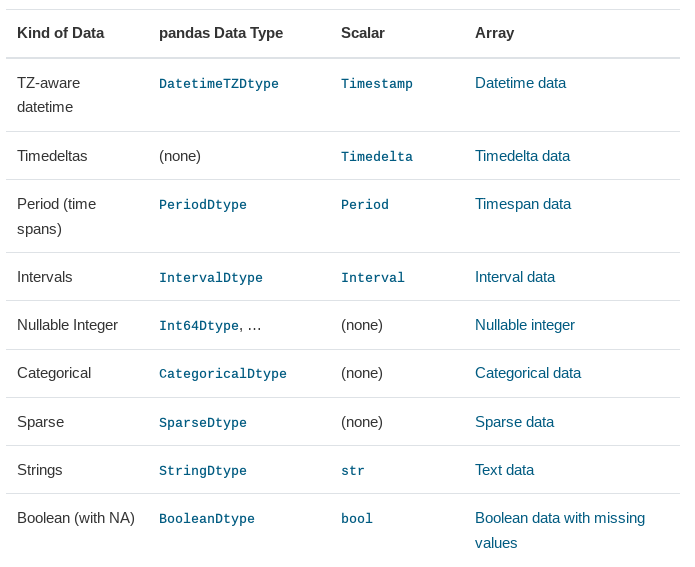
</div>

## Terminology: Classification vs. regression

### Classification:

* **Possible answers:** (small) finite set of options


* **Example 1:** `cat`, `dog`, `cow`
* **Example 2:** `True` or `False` 


* **Typical success evaluation:** fraction of samples with correct prediction

### Regression:

* **Possible answers:** real numbers 


* **Example:** approximate the likelihood of disease


* **Popular success evaluation:**
  $$\frac{1}{|S|} \sum_{(x,y) \in S} \left(f(x) - y\right)^2$$
  where
  * $f$ is a regressor
  * $S$ is a test set


<div align="center">
    <b>Which is the right choice for Homework 1?</b>
</div>

## `sklearn.tree.DecisionTree{Classifier,Regressor}`
* Use `DecisionTreeClassifier` for classification
* Use `DecisionTreeRegressor` for regression

In [15]:
# Data preparation
samples = 30
leafs = 15
X = [[random.uniform(0,2*math.pi)]\
     for i in range(samples)]
y = [math.sin(x[0]) for x in X]

# Training a decision tree regressor
reg = DecisionTreeRegressor(max_leaf_nodes=leafs)
reg = reg.fit(X,y)

# Same thing with a different target error
reg_2 = DecisionTreeRegressor(max_leaf_nodes=leafs,\
        criterion='absolute_error')
reg_2 = reg_2.fit(X,y)

# prepare data for plotting
plot_x = np.arange(0,2*math.pi,0.001)
plot_y = reg.predict([[x] for x in plot_x])
plot_y_2 = reg_2.predict([[x] for x in plot_x])

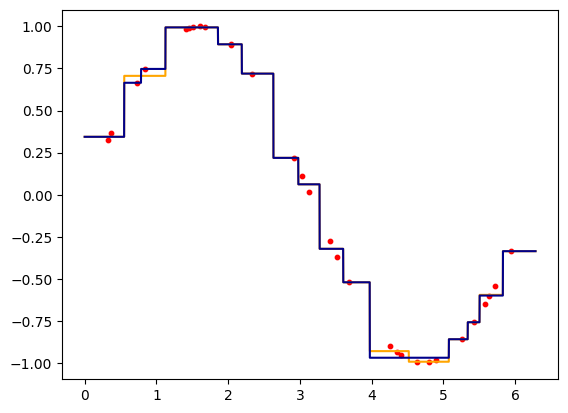

In [16]:
plt.scatter(X,y,s=10,c='red')
plt.plot(plot_x,plot_y,color='orange');
plt.plot(plot_x,plot_y_2,color='darkblue');

## Decision area visualization (simple tool)
* See the attached `decision_area.py`
* Very basic, feel free to modify it

In [9]:
data = pd.read_csv("pizza.csv"); data

,Name,Number,PPG,YearBorn,TotalPoints,LikesPizza
0,Kareem,33,24.6,1947,38387,1
1,Karl,32,25.0,1963,36928,0
2,LeBron,23,27.0,1984,36381,0
3,Kobe,24,25.0,1978,33643,1
4,Michael,23,30.1,1963,32292,0


In [10]:
# select features
features = ['PPG','YearBorn','TotalPoints']
X = data[features]
y = data['LikesPizza']

# train classifier
clf = DecisionTreeClassifier(max_leaf_nodes = 4,\
                             random_state=0)
clf = clf.fit(X,y)

# export to text form
txt = tree.export_text(clf,feature_names = features)

In [19]:
print(txt)

|--- PPG <= 26.00
|   |--- TotalPoints <= 35285.50
|   |   |--- class: 1
|   |--- TotalPoints >  35285.50
|   |   |--- PPG <= 24.80
|   |   |   |--- class: 1
|   |   |--- PPG >  24.80
|   |   |   |--- class: 0
|--- PPG >  26.00
|   |--- class: 0



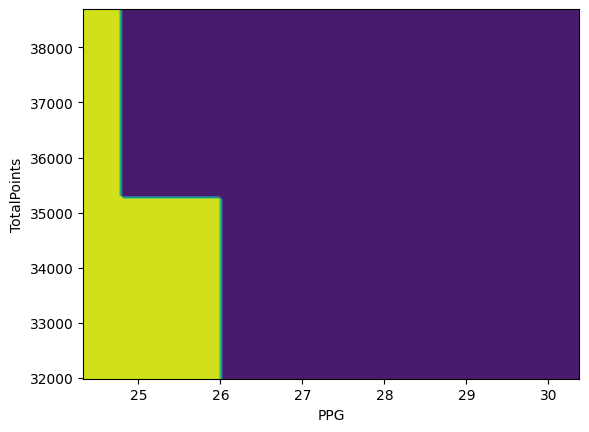

In [21]:
from decision_area import draw_decision_area
draw_decision_area(clf,X,'PPG', 'TotalPoints')

## Ethics of data processing

* **Lots of data sets have private information**

* **Most infamous examples:**

  * Enron emails (https://en.wikipedia.org/wiki/Enron_Corpus). What about affected employees that were not criminally prosecuted?
  
  * AOL search (https://techcrunch.com/2006/08/06/aol-proudly-releases-massive-amounts-of-user-search-data/).  Lawsuits everywhere.  CTO loses their job.
  
  * Netflix data set (https://en.wikipedia.org/wiki/Netflix_Prize).  Cancelled due to lawsuits about releasing people's preferences.
  
  * Cambridge Analytica...

* **Bottom line:**

  * Be careful publishing any data
  
  * Respect privacy of subjects

## K-NN (or K-nearest neighbors)

* Another simple classification algorithm comparable to Classification Decision Trees
* Given a set with M samples and L labels find which label applies to new samples
* Compare a distance metric for new sample against all known samples
* Pick the K closest points from the known samples to the candidate.
* Pick the class with the majority of samples amongst the winners

## Possible distance metrics

* Manhattan distance: $ \sum_{i=0}^{d}{abs(x_i-y_i)} $
* Euclidean distance: $ \sum_{i=0}^{d}{(x_i-y_i)^2} $ (This is usually the default)
* Minkowski distance: $ (\sum_{i=0}^{d}{(abs(x_i-y_i))^p})^{1/p} $
* Higher degrees of exponents make outliers contribute more to the distance (in this case less likely to be similar)

## What are good values of K?

* No great answer (3,5 $\sqrt{N}$, other}
* Small values may not have great discriminatory power.
* Large values may end up overfitting


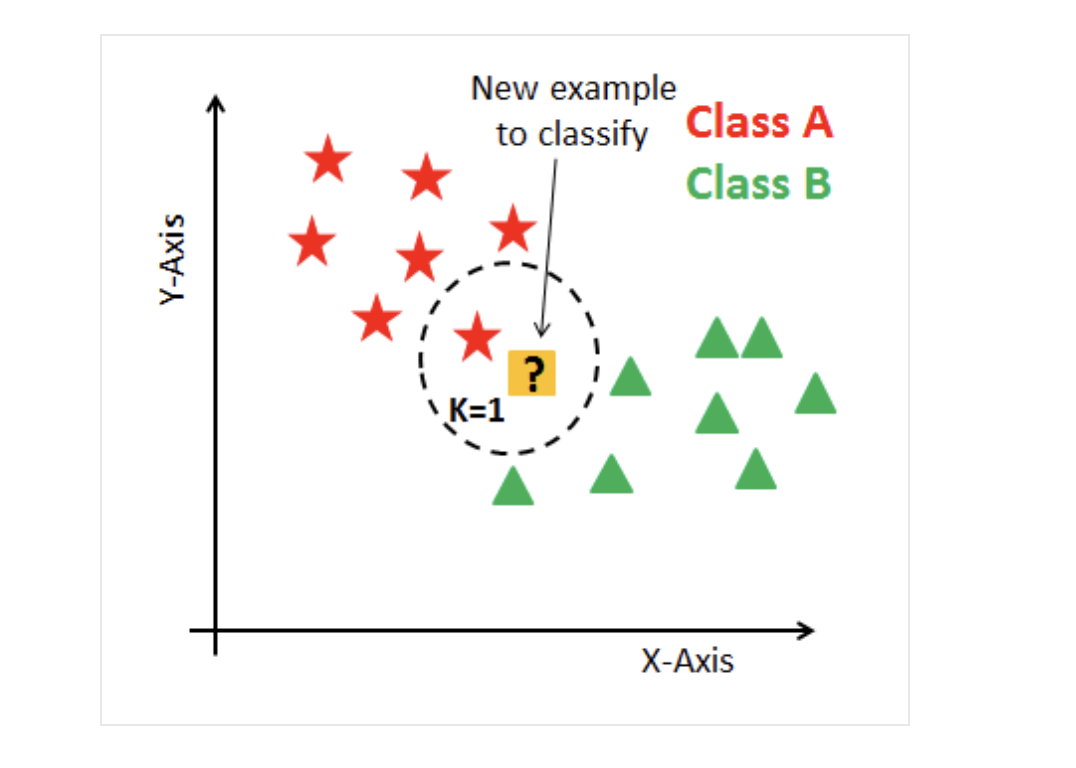

In [11]:
# Let's see an example

from sklearn import datasets
wine = datasets.load_wine()

print(wine.data.shape, wine.target.shape)
print(wine)

(178, 13) (178,)
{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

K:  3 Accuracy: 0.8
K:  5 Accuracy: 0.7777777777777778
K:  7 Accuracy: 0.8222222222222222
K:  9 Accuracy: 0.8444444444444444
K:  11 Accuracy: 0.8222222222222222
K:  13 Accuracy: 0.8222222222222222
[3, 5, 7, 9, 11, 13]
[0.8, 0.7777777777777778, 0.8222222222222222, 0.8444444444444444, 0.8222222222222222, 0.8222222222222222]


/Users/xfu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/xfu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

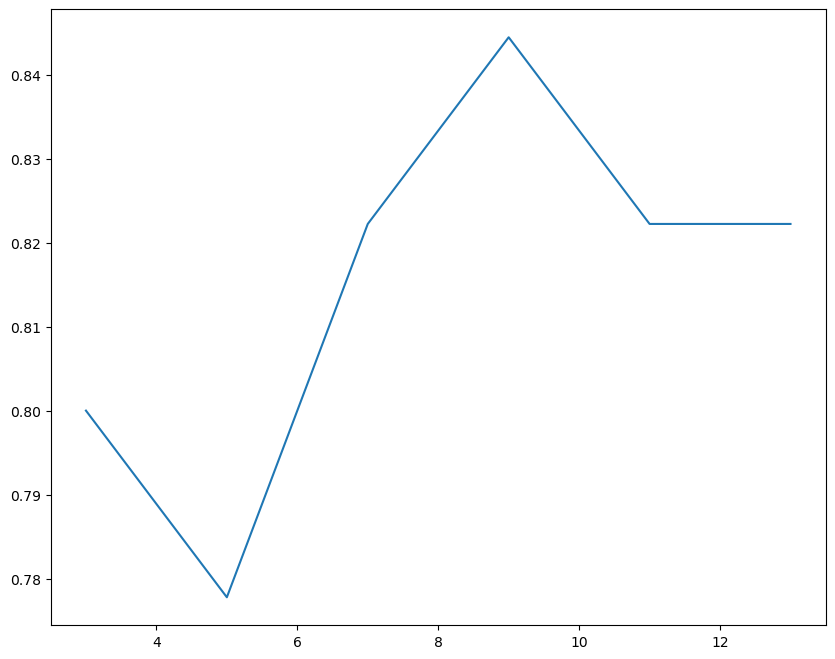

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Which Ks we will try
K = []
# What accuracy do we get
Accuracy = []

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target) 
for k in (3, 5, 7, 9, 11, 13):
  #Create KNN Classifier
  knn = KNeighborsClassifier(n_neighbors=k)
  #Train the model using the training sets
  knn.fit(X_train, y_train)
  #Predict the response for test dataset
  y_pred = knn.predict(X_test)
  # Model Accuracy, how often is the classifier correct?
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print("K: ", k, "Accuracy:", accuracy)
  K.append(k)
  Accuracy.append(accuracy)

print(K)
print(Accuracy)
plt.figure(figsize=(10,8))
plt.plot(K,Accuracy,'-')


## Next time

* k-means